In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Chocolate Sales.csv to Chocolate Sales.csv


In [ ]:
import pandas as pd

# File path
file_path = 'Chocolate Sales.csv'

def read_csv_in_chunks(file_path, chunk_size=1000):
    try:
        print("Reading data in chunks...")
        chunk_list = []  # list to hold chunks
        for chunk in pd.read_csv(file_path, chunksize=chunk_size):
            chunk_list.append(chunk)
        data = pd.concat(chunk_list, ignore_index=True)
        print(f"Successfully read {len(data)} rows.")
        return data
    except FileNotFoundError:
        print("The file was not found.")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except pd.errors.ParserError:
        print("Error parsing the CSV file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# Load the data
df = read_csv_in_chunks(file_path)

# Display first few rows if data is loaded
if df is not None:
    print(df.head())
    print("\nData Summary:")
    print(df.info())


Reading data in chunks...
Successfully read 1094 rows.
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Am

In [ ]:
import pandas as pd

# Load the dataset
file_path = "Chocolate Sales.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Preview the data
print("First 5 rows:")
print(df.head())

# Basic Cleaning
def clean_data(df):
    # Drop rows with any missing values
    df_clean = df.dropna()

    # Remove duplicates
    df_clean = df_clean.drop_duplicates()

    # Convert date columns if needed (example)
    if 'Date' in df_clean.columns:
        df_clean['Date'] = pd.to_datetime(df_clean['Date'])

    return df_clean

# Perform Calculations
def total_sales(df):
    if 'Total Sales' in df.columns:
        return df['Total Sales'].sum()
    elif 'Unit Price' in df.columns and 'Quantity Sold' in df.columns:
        return (df['Unit Price'] * df['Quantity Sold']).sum()
    else:
        return "Cannot calculate total sales – missing columns."

def average_price(df):
    if 'Unit Price' in df.columns:
        return df['Unit Price'].mean()
    else:
        return "Unit Price column not found."

def sales_by_category(df):
    if 'Category' in df.columns and 'Total Sales' in df.columns:
        return df.groupby('Category')['Total Sales'].sum()
    else:
        return "Required columns for category-based sales not found."

# Main logic
df_clean = clean_data(df)
print("\nTotal Sales:", total_sales(df_clean))
print("Average Price:", average_price(df_clean))
print("\nSales by Category:")
print(sales_by_category(df_clean))


First 5 rows:
     Sales Person    Country              Product       Date    Amount  \
0  Jehu Rudeforth         UK      Mint Chip Choco  04-Jan-22   $5,320    
1     Van Tuxwell      India        85% Dark Bars  01-Aug-22   $7,896    
2    Gigi Bohling      India  Peanut Butter Cubes  07-Jul-22   $4,501    
3    Jan Morforth  Australia  Peanut Butter Cubes  27-Apr-22  $12,726    
4  Jehu Rudeforth         UK  Peanut Butter Cubes  24-Feb-22  $13,685    

   Boxes Shipped  
0            180  
1             94  
2             91  
3            342  
4            184  

Total Sales: Cannot calculate total sales – missing columns.
Average Price: Unit Price column not found.

Sales by Category:
Required columns for category-based sales not found.


<ipython-input-11-94bcb2e9299a>:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['Date'] = pd.to_datetime(df_clean['Date'])


In [ ]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

# Load the dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the supervised model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average="weighted")
recall = recall_score(y_test, y_pred, average="weighted")

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))


Model Evaluation Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Model Evaluation Metrics:
Accuracy: 1.00

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



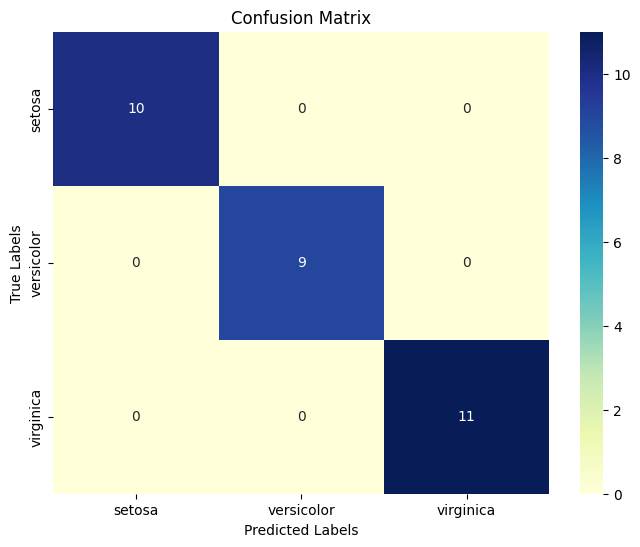

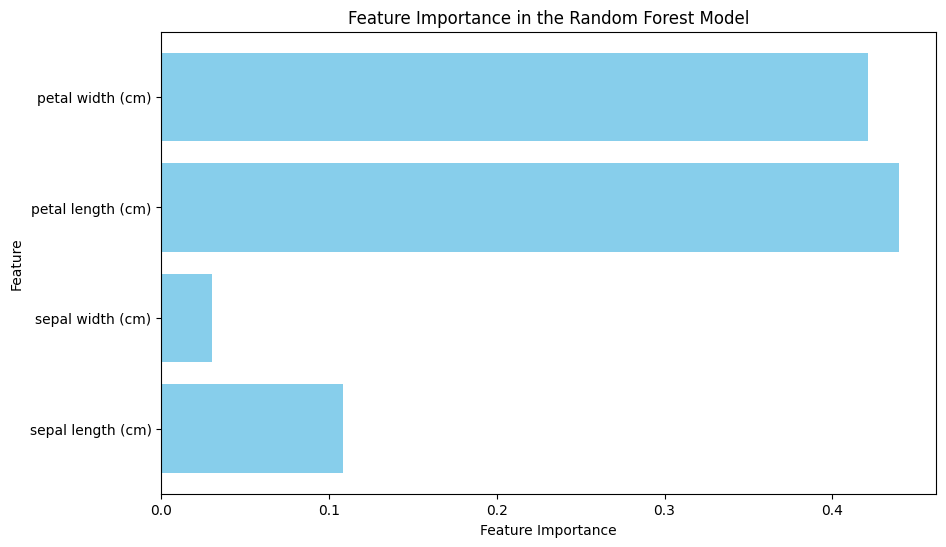

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the dataset (Iris dataset as an example)
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the supervised model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict using the model
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Feature importance visualization
feature_importances = model.feature_importances_
features = data.feature_names

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances, color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in the Random Forest Model")
plt.show()


In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

def load_data():
    """Load the Iris dataset."""
    data = load_iris()
    return data.data, data.target, data.feature_names, data.target_names

def train_model(X_train, y_train):
    """Train the Random Forest model."""
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_test, y_test, target_names):
    """Evaluate the model and display results."""
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("\nModel Evaluation Metrics:")
    print(f"Accuracy: {accuracy:.2f}")
    print("\nDetailed Classification Report:")
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Confusion matrix visualization
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, cmap="YlGnBu", fmt='d',
                xticklabels=target_names, yticklabels=target_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

def feature_importance(model, features):
    """Display feature importance."""
    feature_importances = model.feature_importances_
    plt.figure(figsize=(10, 6))
    plt.barh(features, feature_importances, color="skyblue")
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance in the Random Forest Model")
    plt.show()

def main():
    """Main CLI function."""
    print("Welcome to the Machine Learning CLI!")
    print("Choose an option:")
    print("1. Evaluate Model Performance")
    print("2. Visualize Feature Importance")
    print("3. Quit")

    X, y, features, target_names = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = train_model(X_train, y_train)

    while True:
        choice = input("\nEnter your choice: ")
        if choice == "1":
            evaluate_model(model, X_test, y_test, target_names)
        elif choice == "2":
            feature_importance(model, features)
        elif choice == "3":
            print("Exiting the program. Goodbye!")
            break
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


Welcome to the Machine Learning CLI!
Choose an option:
1. Evaluate Model Performance
2. Visualize Feature Importance
3. Quit

Enter your choice: 3
Exiting the program. Goodbye!


In [ ]:
"""
Calculator Application
-----------------------
This is a simple calculator application that supports addition, subtraction,
multiplication, and division operations.
"""

class Calculator:
    """
    A class representing a basic calculator.

    Methods:
        add(a, b): Returns the sum of two numbers.
        subtract(a, b): Returns the difference of two numbers.
        multiply(a, b): Returns the product of two numbers.
        divide(a, b): Returns the quotient of two numbers (handles division by zero).
    """

    def add(self, a, b):
        """Returns the sum of a and b."""
        return a + b

    def subtract(self, a, b):
        """Returns the difference of a and b."""
        return a - b

    def multiply(self, a, b):
        """Returns the product of a and b."""
        return a * b

    def divide(self, a, b):
        """
        Returns the quotient of a and b.
        Raises:
            ValueError: If division by zero is attempted.
        """
        if b == 0:
            raise ValueError("Cannot divide by zero.")
        return a / b


def main():
    """
    Main function to demonstrate the usage of the Calculator class.
    """
    calc = Calculator()

    print("Welcome to the Calculator Application!")
    print("1. Add | 2. Subtract | 3. Multiply | 4. Divide")
    choice = int(input("Enter your choice (1-4): "))

    num1 = float(input("Enter the first number: "))
    num2 = float(input("Enter the second number: "))

    if choice == 1:
        result = calc.add(num1, num2)
        operation = "addition"
    elif choice == 2:
        result = calc.subtract(num1, num2)
        operation = "subtraction"
    elif choice == 3:
        result = calc.multiply(num1, num2)
        operation = "multiplication"
    elif choice == 4:
        try:
            result = calc.divide(num1, num2)
            operation = "division"
        except ValueError as e:
            print(e)
            return
    else:
        print("Invalid choice!")
        return

    print(f"The result of {operation} is: {result}")


if __name__ == "__main__":
    main()


Welcome to the Calculator Application!
1. Add | 2. Subtract | 3. Multiply | 4. Divide
Enter your choice (1-4): 2
Enter the first number: 25
Enter the second number: 63
The result of subtraction is: -38.0
